In [649]:
import torch
from egnn_pytorch import EGNN_Network

import torch.nn as nn


#feats = torch.ones((1,24), dtype=int)
# Define learnable embeddings


coors = torch.tensor([[
    [42.677, 7.757, 12.295],   # N
    [42.591, 6.743, 12.364],   # H
    [43.902, 8.261, 12.895],   # CA
    [43.609, 9.188, 13.389],   # HA
    [44.899, 8.748, 11.824],   # C
    [45.598, 9.722, 12.046],   # O
    [44.507, 7.304, 13.893],   # CB
    [44.553, 6.216, 13.844],   # HB2
    [43.949, 7.467, 14.815],   # HB3
    [45.942, 7.714, 14.190],   # CG
    [46.624, 7.000, 14.652],   # HG2
    [46.297, 7.552, 13.172],   # HG3
    [46.098, 8.566, 15.453],   # CD
    [45.432, 9.428, 15.421],   # HD2
    [45.864, 8.023, 16.369],   # HD3
    [47.437, 9.171, 15.645],   # NE
    [48.036, 8.718, 16.335],   # HE
    [48.159, 9.908, 14.753],   # CZ
    [47.793, 10.201, 13.491],  # NH1
    [48.497, 10.668, 12.920],  # HH11
    [46.880, 10.644, 13.590],  # HH12
    [49.340, 10.374, 15.149],  # NH2
    [50.143, 9.902, 14.733],   # HH21
    [49.831, 10.816, 15.926],  # HH22
]], dtype=torch.float32)





import itertools

species = torch.tensor([
    0,  # N
    1,  # H
    2,  # CA
    1,  # HA
    2,  # C
    3,  # O
    2,  # CB
    1,  # HB2
    1,  # HB3
    2,  # CG
    1,  # HG2
    1,  # HG3
    2,  # CD
    1,  # HD2
    1,  # HD3
    0,  # NE
    1,  # HE
    2,  # CZ
    0,  # NH1
    1,  # HH11
    1,  # HH12
    0,  # NH2
    1,  # HH21
    1   # HH22
], dtype=torch.int)

species = torch.tensor([
    0,  # N
    1,  # H
    2,  # CA
    1,  # HA
    2,  # C
    3,  # O
    2,  # CB
    1,  # HB2
    1,  # HB3
    2,  # CG
    1,  # HG2
    1,  # HG3
    2,  # CD
    1,  # HD2
    1,  # HD3
    0,  # NE
    1,  # HE
    2,  # CZ
    0,  # NH1
    1,  # HH11
    1,  # HH12
    0,  # NH2
    1,  # HH21
], dtype=torch.int)

# Create a tensor with 1s for hydrogen (species == 1) and 0s elsewhere
feats = torch.where(species == 1, torch.tensor(1), torch.tensor(0)).unsqueeze(0)


# Indices to keep
an = [15, 18,21] #nnn
cat = [16,17,19,20,22]

# Create a zero tensor
new_species = torch.zeros_like(species)

# Set specified indices to 1
new_species[an] = -1
new_species[cat] = 1


new_species

positive_pairs = [(i, j) for i, j in itertools.combinations(cat, 2)]
positive_pairs += [(i, j) for i, j in itertools.combinations(an, 2)]

negative_pairs = [(i, j) for i in cat for j in an]







import torch.nn.functional as F

def contrastive_loss(latent_features, species, margin):
    loss = 0.0

    positive_pairs = [(i, j) for i, j in itertools.combinations(range(len(species)), 2) if species[i] == species[j]]
    negative_pairs = [(i, j) for i, j in itertools.combinations(range(3), 2) if species[i] != species[j]]

    #num_positives = len(positive_pairs)

    # Positive pairs
    for i, j in positive_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)  # Euclidean distance
        loss += dist ** 2  # Minimize distance for positive pairs

    # Negative pairs
    for i, j in negative_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)
        loss += torch.clamp(margin - dist, min=0) ** 2  # Enforce margin

    return loss / (len(positive_pairs) + len(negative_pairs))

import torch.nn.functional as F




def CL2(latent_features, species, margin):
    loss = 0.0

    positive_pairs = [(i, j) for i, j in itertools.combinations(range(coors.shape[1]), 2) if species[i] == species[j]]
    negative_pairs = [(i, j) for i, j in itertools.combinations(range(3), 2) if species[i] != species[j]]

    #num_positives = len(positive_pairs)

    # Positive pairs
    for i, j in positive_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)  # Euclidean distance
        loss += dist ** 2  # Minimize distance for positive pairs

    # Negative pairs
    for i, j in negative_pairs:
        z_i, z_j = latent_features[i], latent_features[j]
        dist = torch.norm(z_i - z_j, p=2)
        loss += torch.clamp(margin - dist, min=0) ** 2  # Enforce margin

    return loss / (len(positive_pairs) + len(negative_pairs))

import torch.nn.functional as F

def __contrastive_loss(latent_features, species, margin):
    
    return
    loss = 0.0

    # Normalize latent features for cosine similarity
    latent_features = torch.nn.functional.normalize(latent_features, p=2, dim=1)

    # Compute positive pair loss
    pos_loss = 0.0
    for i, j in positive_pairs:
        similarity = torch.dot(latent_features[i], latent_features[j])
        pos_loss += (similarity - 1) ** 2  # Encourage similarity to be 1
    if len(positive_pairs) > 0:
        pos_loss /= len(positive_pairs)  # Average over positive pairs

    # Compute negative pair loss
    neg_loss = 0.0
    for i, j in negative_pairs:
        similarity = torch.dot(latent_features[i], latent_features[j])
        neg_loss += torch.max(torch.tensor(0.0), margin - similarity) ** 2  # Push dissimilar embeddings apart
    if len(negative_pairs) > 0:
        neg_loss /= len(negative_pairs)  # Average over negative pairs

    # Combine losses
    lambda_pos = 0.1  # Weight for positive loss
    total_loss = lambda_pos * pos_loss + (1 - lambda_pos) * neg_loss

    return total_loss
#Forward pass
#feats_out, coors_out = net(feats, coors)  # Latent representations for nodes

# Compute contrastive loss
#latent_features = feats_out[0]  # Shape: (num_nodes, dim)
#loss = contrastive_loss(latent_features, positive_pairs)

#print("Contrastive Loss:", loss)
#print(feats_out)
#print(coors_out)



#low depth = local, high depth = l.r.
net = EGNN_Network(
    num_tokens = 10, #vocabulary siye, number of unique species
    num_positions = 24,  #number of nodes         # unless what you are passing in is an unordered set, set this to the maximum sequence length
    dim = 2,# #internal rep size. c has square dependence. richer rep but overfitting for small d.s.
    depth = 2, #number of layers #deeper need more memort to store intermediate reps
    num_nearest_neighbors = 1, #number of nearest neighbors to consider #make this the max hood size
    coor_weights_clamp_value = 2.   # absolute clamped value for the coordinate weights, needed if you increase the num neareest neighbors
)


















from torch.optim.lr_scheduler import LambdaLR

def warmup_lr(epoch):
    warmup_epochs = 10  # Number of warm-up epochs
    if epoch < warmup_epochs:
        return epoch / warmup_epochs  # Gradually increase LR
    return 1.0  # Keep LR stable after warm-up

# Apply warm-up scheduler


import torch
import numpy as np
import random

net = EGNN_Network(
    num_tokens = 10, #vocabulary siye, number of unique species
    num_positions = coors.shape[1],  #number of nodes         # unless what you are passing in is an unordered set, set this to the maximum sequence length
    dim = 6,# #internal rep size. c has square dependence. richer rep but overfitting for small d.s.
    depth = 3, #number of layers #deeper need more memort to store intermediate reps
    num_nearest_neighbors = 1, #number of nearest neighbors to consider #make this the max hood size
    coor_weights_clamp_value = 2.   # absolute clamped value for the coordinate weights, needed if you increase the num neareest neighbors
)

optimizer = torch.optim.Adam(net.parameters(), lr=0.1, weight_decay=1e-3)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.01)
#scheduler = LambdaLR(optimizer, lr_lambda=warmup_lr)
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
# Training loop
for epoch in range(200):
    optimizer.zero_grad()

    # Forward pass
    feats_out, coors_out = net(feats, coors)
    print(2)
    

    # Compute loss
    #latent_features = feats_out[0]

    #latent_features = F.normalize(latent_features, p=2, dim=1)

    
    #loss = contrastive_loss(latent_features, species, margin=3)

    # Backward pass
    #loss.backward()
    #optimizer.step()

    
    
    #print(f"Epoch {epoch}: Loss = {loss.item()}")
    #print(coors_out, feats_out)
    


    ####
    

    featsss_, coors_out = net(species.unsqueeze(0), coors)
# Apply softmax along a specific dimension (e.g., last dimension)
    featss_ = F.softmax(nn.Tanh()(nn.LeakyReLU(negative_slope=0.01)(featsss_)), dim=1)  # Sum along dim=1 will be 1
    #featss_ = nn.Tanh()(nn.ReLU()(featsss_))
    #feats_ = F.normalize(latent_features, p=1, dim=1)  # Normalize for cosine similarity

    
# Shift and normalize
    #shifted_features = nn.Tanh()(featss_) + 1  # Shift to [0, 2]
    #normalized_features = shifted_features / shifted_features.sum()  # Normalize to sum to 1

# Shift back to [-1, 1] range while preserving sum-to-1
    #final_features = 2 * normalized_features - 1

    feats_ = featss_  / featss_.abs().max() 
    #feats_ = featss_  / featss_.abs().max()
    

    

    # Compute loss
    latent_feature = feats_[0]

    #latent_features = F.normalize(latent_features, p=2, dim=1)

    
    L = contrastive_loss(latent_feature, new_species, margin=1)

        # Backward pass
    L.backward()
    optimizer.step()

    #scheduler.step()

    #for name, param in net.named_parameters():
    #    if 'coors_mlp' in name or param.grad.norm() < 1e-7:
    #        torch.nn.init.xavier_uniform_(param)

    print(f"Epoch {epoch}: Loss = {L.item()}")





#print(loss.item(),latent_features, coors_out)

RuntimeError: index 23 is out of bounds for dimension 2 with size 23

In [525]:
import numpy as np
#p.multiply(
f = out.detach().numpy()*coors[0].detach().numpy().T

In [499]:
out = torch.mean(latent_feature, dim=1)
out.sum()/23


tensor(0.9293, grad_fn=<DivBackward0>)

In [512]:
.9293 - 0.9466
#g = Eelectronic, loc - S, where S is a structural feat in here and later, it is an interaction feat
#so put the eleec rep into a network 
#divergence measures source and sink, can put in those involved with 

-0.017299999999999982

In [510]:
out = torch.mean(latent_feature, dim=1)
out.sum()/23

tensor(0.9466, grad_fn=<DivBackward0>)

In [514]:
out

tensor([0.9459, 0.9457, 0.9470, 0.9456, 0.9470, 0.9465, 0.9469, 0.9457, 0.9455,
        0.9469, 0.9455, 0.9456, 0.9471, 0.9457, 0.9454, 0.9376, 0.9516, 0.9550,
        0.9377, 0.9537, 0.9547, 0.9376, 0.9523], grad_fn=<MeanBackward1>)

In [ ]:
o

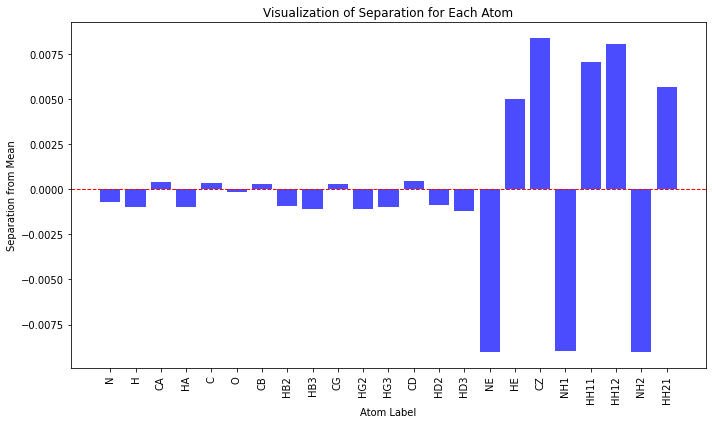

In [511]:
#latent_feature.sum()/72

#out = torch.mean(latent_feature, dim=1)
#out.sum()/24
r = [[float(v), s] for v,s in zip(out, species_strings)]

#r = torch.sum(latent_feature, dim=1)


import pandas as pd
import matplotlib.pyplot as plt

# Data: tensor values (second column) and labels
data = [
    [0.9953, 'N'],
    [0.9984, 'H'],
    [1.0000, 'CA'],
    [0.9983, 'HA'],
    [0.9986, 'C'],
    [0.9953, 'O'],
    [0.9978, 'CB'],
    [0.9984, 'HB2'],
    [0.9984, 'HB3'],
    [0.9977, 'CG'],
    [0.9980, 'HG2'],
    [0.9984, 'HG3'],
    [0.9978, 'CD'],
    [0.9984, 'HD2'],
    [0.9984, 'HD3'],
    [0.9917, 'NE'],
    [0.9987, 'HE'],
    [0.9978, 'CZ'],
    [0.9917, 'NH1'],
    [0.9987, 'HH11'],
    [0.9987, 'HH12'],
    [0.9917, 'NH2'],
    [0.9987, 'HH21'],
    [0.9987, 'HH22']
]

# Convert data to DataFrame
df = pd.DataFrame(r, columns=["Value", "Label"])

# Calculate the mean of the column
mean_value = df["Value"].mean()

# Calculate separation from the mean
df["Separation"] = df["Value"] - mean_value

# Plot separation
plt.figure(figsize=(10, 6))
plt.bar(df["Label"], df["Separation"], color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Atom Label")
plt.ylabel("Separation from Mean")
plt.title("Visualization of Separation for Each Atom")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [430]:
out.sum()/24

tensor(0.9293, grad_fn=<DivBackward0>)

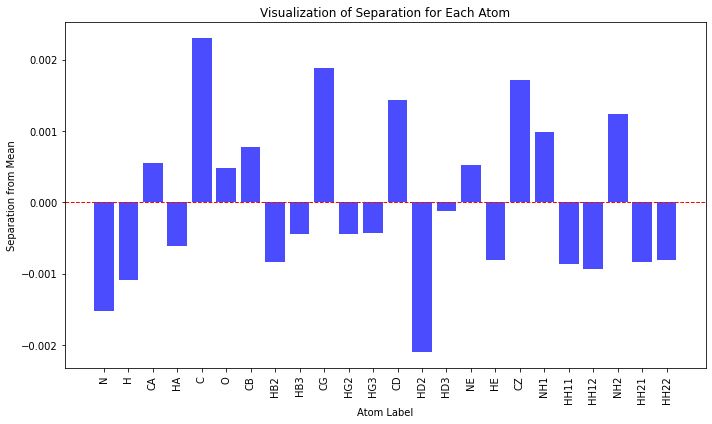

In [342]:
r = [[float(v[3]), s] for v,s in zip(latent_feature, species_strings)]



import pandas as pd
import matplotlib.pyplot as plt

# Data: tensor values (second column) and labels
data = [
    [0.9953, 'N'],
    [0.9984, 'H'],
    [1.0000, 'CA'],
    [0.9983, 'HA'],
    [0.9986, 'C'],
    [0.9953, 'O'],
    [0.9978, 'CB'],
    [0.9984, 'HB2'],
    [0.9984, 'HB3'],
    [0.9977, 'CG'],
    [0.9980, 'HG2'],
    [0.9984, 'HG3'],
    [0.9978, 'CD'],
    [0.9984, 'HD2'],
    [0.9984, 'HD3'],
    [0.9917, 'NE'],
    [0.9987, 'HE'],
    [0.9978, 'CZ'],
    [0.9917, 'NH1'],
    [0.9987, 'HH11'],
    [0.9987, 'HH12'],
    [0.9917, 'NH2'],
    [0.9987, 'HH21'],
    [0.9987, 'HH22']
]

# Convert data to DataFrame
df = pd.DataFrame(r, columns=["Value", "Label"])

# Calculate the mean of the column
mean_value = df["Value"].mean()

# Calculate separation from the mean
df["Separation"] = df["Value"] - mean_value

# Plot separation
plt.figure(figsize=(10, 6))
plt.bar(df["Label"], df["Separation"], color='blue', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Atom Label")
plt.ylabel("Separation from Mean")
plt.title("Visualization of Separation for Each Atom")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [90]:
new_species

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  1,  1,
        -1,  1,  1, -1,  1,  1], dtype=torch.int32)

In [ ]:
new

In [121]:
for name, param in net.named_parameters():
    if param.grad is not None:
        print(f"Layer: {name}, Gradient Norm: {param.grad.norm()}")


Layer: token_emb.weight, Gradient Norm: 2.7888880140380934e-05
Layer: pos_emb.weight, Gradient Norm: 2.7831414627144113e-05
Layer: layers.0.1.edge_mlp.0.weight, Gradient Norm: 2.0683472545876146e-17
Layer: layers.0.1.edge_mlp.0.bias, Gradient Norm: 4.207091880642677e-18
Layer: layers.0.1.edge_mlp.3.weight, Gradient Norm: 1.1422879135636332e-11
Layer: layers.0.1.edge_mlp.3.bias, Gradient Norm: 7.276169250447495e-11
Layer: layers.0.1.node_norm.weight, Gradient Norm: 3.8026253257328335e-09
Layer: layers.0.1.node_norm.bias, Gradient Norm: 2.9727047490268887e-09
Layer: layers.0.1.node_mlp.0.weight, Gradient Norm: 5.991668103888514e-07
Layer: layers.0.1.node_mlp.0.bias, Gradient Norm: 4.586173929510551e-07
Layer: layers.0.1.node_mlp.3.weight, Gradient Norm: 4.005165123999177e-07
Layer: layers.0.1.node_mlp.3.bias, Gradient Norm: 2.426843457215e-05
Layer: layers.0.1.coors_mlp.0.weight, Gradient Norm: 0.0
Layer: layers.0.1.coors_mlp.0.bias, Gradient Norm: 0.0
Layer: layers.0.1.coors_mlp.3.weigh

In [41]:
species_strings = [
    "N",    # 0
    "H",    # 1
    "CA",   # 2
    "HA",   # 1
    "C",    # 2
    "O",    # 3
    "CB",   # 2
    "HB2",  # 1
    "HB3",  # 1
    "CG",   # 2
    "HG2",  # 1
    "HG3",  # 1
    "CD",   # 2
    "HD2",  # 1
    "HD3",  # 1
    "NE",   # 0
    "HE",   # 1
    "CZ",   # 2
    "NH1",  # 0
    "HH11", # 1
    "HH12", # 1
    "NH2",  # 0
    "HH21", # 1
    "HH22"  # 1
]

net charge can determine wrt its connectivity
if hydrogens are hydrogen bonded their q is partial, covalent then not
Coupling Through Constraints

Two systems can be coupled by enforcing shared constraints or objectives.
Example:

    System 1 predicts the structure of a molecule.
    System 2 predicts its binding energy.
    Constraint: Ensure the structural predictions align with known chemical rules, improving the performance of both systems.

grand canonical vs canonical

microcanonical -- canonical -- grand can



microcanonical: entropy 
all of the atoms which are able to 



i can multiply the feature representation (Zs?) by the 3d coordinates
I can multiply the perterped pairwise distance with the perterped so long as they satisfy the equation

.

F = contribution x + 
divergence charges else not
F(xyz) = (cX, cY, cZ)
sink = anion, 0 = cation, 1 = neutral

in toy model when theres no ions around,
all the individual but hydrogen bonds are 0 wrt being the same (making no partial charges, can later put metals too?).
then it can figure out what is c on F(xyz) = (c1X, c2Y, c3Z). so the output of a layer will just be a vector field directly, then...

c1, c2 

can rep features on polar map r, theta

z = weight?

since angle is periodic, can use the elements as the angle vector 



SyntaxError: invalid syntax (<ipython-input-15-625bbb3d5509>, line 1)

In [ ]:
can have two coup

polarity correlates w dialectric constant

in summary, this model can be used to identify chemical species.

In [138]:
# Normalize latent column to 0–1
import numpy as np
latent_column=feats_out[0][:,0]
normalized = (latent_column - latent_column.min()) / (latent_column.max() - latent_column.min())

# Scale to a fixed range of integers
num_groups = 4
a = np.floor(normalized.detach().numpy() * num_groups).astype(int) + 1  # Map to 1, 2, ..., num_groups

#print("Normalized:", normalized)
#print("Grouped Indices:", group_indices)
a


array([4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 1, 1, 4,
       1, 1])

In [139]:
from sklearn.cluster import KMeans
import torch
latent_column=feats_out[0][:,0]
# Example latent space column
#latent_column = torch.tensor([-3.0, -2.1, -1.5, -0.8, 0.0, 1.2, 2.5], dtype=torch.float32)

# Perform k-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
a = kmeans.fit_predict(latent_column.unsqueeze(1).detach().numpy())

#print("Cluster Labels:", cluster_labels)
a


array([1, 2, 0, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1,
       2, 2], dtype=int32)

In [144]:
latent_column=feats_out[0][:,1]

b = kmeans.fit_predict(latent_column.unsqueeze(1).detach().numpy())

#print("Cluster Labels:", b)
b

array([2, 0, 1, 0, 1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       0, 0], dtype=int32)

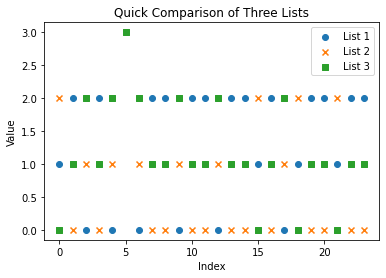

In [154]:
#species = species.numpy()
import matplotlib.pyplot as plt
import numpy as np

# Example lists
list1 = a
list2 = b
list3 = species

# Convert to numpy for efficient operations
lists = np.array([list1, list2, list3])


x = range(len(list1))  # Indices for the lists
plt.scatter(x, list1, label="List 1", marker='o')
plt.scatter(x, list2, label="List 2", marker='x')
plt.scatter(x, list3, label="List 3", marker='s')

# Add labels and legend
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Quick Comparison of Three Lists")
plt.legend()
plt.show()


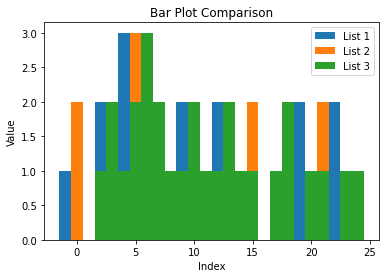

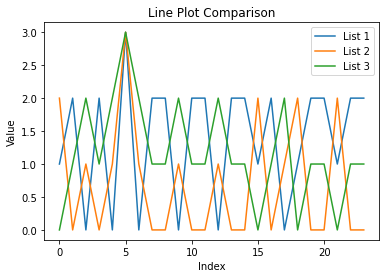

In [153]:
import matplotlib.pyplot as plt
import numpy as np

# Example lists
list1 = a
list2 = b
list3 = species

# Convert to numpy for efficient operations
lists = np.array([list1, list2, list3])

# Bar plot for visual comparison
x = np.arange(len(list1))  # Indices
width = 1  # Bar width
plt.bar(x - width, list1, width=width, label="List 1")
plt.bar(x, list2, width=width, label="List 2")
plt.bar(x + width, list3, width=width, label="List 3")

plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("Bar Plot Comparison")
plt.show()

# Line plot alternative
for i, lst in enumerate(lists, start=1):
    plt.plot(lst, label=f"List {i}")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.title("Line Plot Comparison")
plt.show()


In [ ]:
species = torch.tensor([
    0,  # N
    1,  # H
    2,  # CA
    1,  # HA
    2,  # C
    3,  # O
    2,  # CB
    1,  # HB2
    1,  # HB3
    2,  # CG
    1,  # HG2
    1,  # HG3
    2,  # CD
    1,  # HD2
    1,  # HD3
    0,  # NE
    1,  # HE
    2,  # CZ
    0,  # NH1
    1,  # HH11
    1,  # HH12
    0,  # NH2
    1,  # HH21
    1   # HH22
], dtype=torch.int)

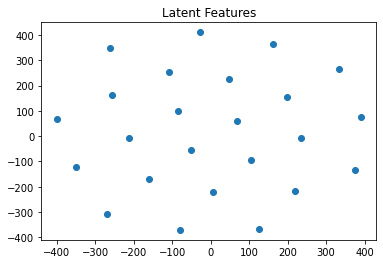

In [118]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

latent_features_np = feats_out[0].detach().numpy()  # Convert to NumPy
latent_2d = TSNE(n_components=2).fit_transform(latent_features_np)

plt.scatter(latent_2d[:, 0], latent_2d[:, 1])
plt.title("Latent Features")
plt.show()


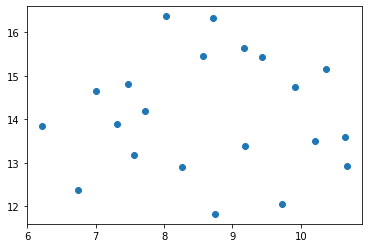

In [589]:
plt.plot(original_positions[1:-1, 1], original_positions[1:-1, 2], "o")

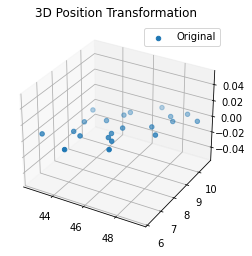

In [578]:
original_positions = coors[0].detach().numpy()
updated_positions = coors_out[0].detach().numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(original_positions[1:-1, 0], original_positions[1:-1, 1], label="Original")
#ax.scatter(updated_positions[:, 0], updated_positions[:, 1], updated_positions[:, 2], label="Updated")

D=D[1:-1]
 #Add labels to points
for i in range(1,len(D)-1):
    ax.text(D[i, 0], D[i, 1], D[i, 2], species_strings[i], fontsize=9)
#ax.scatter(D[1:-1,0], D[1:-1,1], D[1:-1, 2], label="Updated")
plt.legend()
plt.title("3D Position Transformation")
plt.show()

In [565]:
len(D)
#species_strings

23

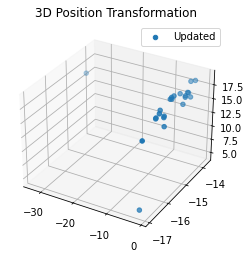

In [555]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(original_positions[:, 0], original_positions[:, 1] label="Original")
ax.scatter(D[:, 0], D[:, 1], D[:, 2], label="Updated")
plt.legend()
plt.title("3D Position Transformation")
plt.show()

plt.legend()
plt.title("3D Position Transformation")
plt.show()

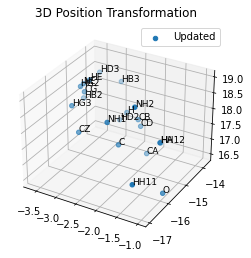

In [566]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Example positions for demonstration
# Replace `D` with your actual data array and `labels` with your point labels

#labels = ['Point 1', 'Point 2', 'Point 3']

# Scatter plot
ax.scatter(D[1:-1, 0], D[1:-1, 1], D[1:-1, 2], label="Updated")

# Add labels to points
for i in range(1,len(D)-1):
    ax.text(D[i, 0], D[i, 1], D[i, 2], species_strings[i], fontsize=9)

plt.legend()
plt.title("3D Position Transformation")
plt.show()


In [557]:
combined = np.column_stack(f).flatten()
combined.reshape(-1, 3)
def divergence(field):
    "return the divergence of a n-D field"
    return np.gradient(field)
d=divergence(combined)
ax.scatter(D[1:-1, 0], D[1:-1, 1], D[1:-1, 2], label="Updated")

# Add labels to points
for i in range(1,len(D)-1):
    ax.text(D[i, 0], D[i, 1], D[i, 2], species_strings[i], fontsize=9)

plt.legend()
plt.title("3D Position Transformation")
plt.show()


tensor([0, 1, 2, 1, 2, 3, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 0, 1],
       dtype=torch.int32)

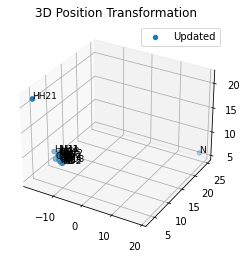

In [627]:
combined = np.column_stack(f).flatten()
combined.reshape(-1, 3)
def divergence(field):
    "return the divergence of a n-D field"
    return np.gradient(np.gradient(field))
d=divergence(combined)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
from matplotlib import pyplot as plt

D=np.array(d).reshape(-1,3)

ax.scatter(D[:, 0], D[:, 1], D[:, 2], label="Updated")
for i in range(0,len(D)):
    ax.text(D[i, 0], D[i, 1], D[i, 2], species_strings[i], fontsize=9)

# Add labels to points
#for i in range(0,len(D)):
    #ax.text(D[i, 0], D[i, 1], D[i, 2], species_strings[i], fontsize=9)

plt.legend()
plt.title("3D Position Transformation")
plt.show()

In [560]:
import numpy as np

def calculate_mesh_surface_area(vertices, faces):
    # Compute the area of each triangle
    def triangle_area(v1, v2, v3):
        return 0.5 * np.linalg.norm(np.cross(v2 - v1, v3 - v1))

    total_area = 0
    for face in faces:
        v1, v2, v3 = vertices[face]
        total_area += triangle_area(v1, v2, v3)

    return total_area

# Example vertices and faces
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])
faces = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [0, 2, 3],
    [1, 2, 3]
])

print("Surface Area:", calculate_mesh_surface_area(ve, faces))


Surface Area: 2.3660254037844384


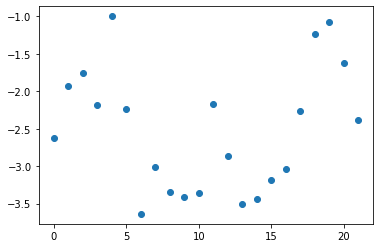

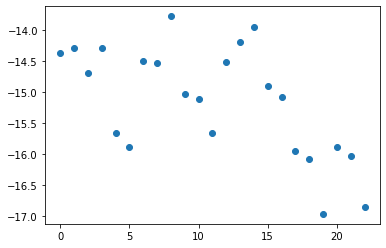

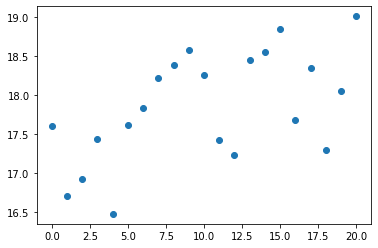

In [590]:
combined = np.column_stack(f).flatten()
combined.reshape(-1, 3)
def divergence(field):
    "return the divergence of a n-D field"
    return np.gradient(field)
d=divergence(combined)
from matplotlib import pyplot as plt
plt.plot(d.reshape(-1,3)[:,0][1:], "o")
plt.show()
plt.plot(d.reshape(-1,3)[:,1], "o")
plt.show()
plt.plot(d.reshape(-1,3)[:,2][1:][:-1], "o")
D=d.reshape(-1,3)


In [647]:
np.sum(D[23])

IndexError: index 23 is out of bounds for axis 0 with size 23

In [ ]:
#Plotting vector fields
import matplotlib.pyplot as plt
import numpy as np

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x; v = 3*y

fig, ax = plt.subplots(figsize=(10,6))
q = ax.quiver(x[::2], y[::2], u[::2], v[::2])

ax.set_title(r'Vector field $\vec{F} = x\vec{i}+3y\vec{j})$')
ax.quiverkey(q, 0.8, 0.9, 5, r'3 unit lengths', labelpos='E',
                   coordinates='figure')

fig.savefig('vectorfield.png')
plt.show()

In [542]:
len(d)

69

In [ ]:
species = torch.tensor([
    0,  # N
    1,  # H
    2,  # CA
    1,  # HA
    2,  # C
    3,  # O
    2,  # CB
    1,  # HB2
    1,  # HB3
    2,  # CG
    1,  # HG2
    1,  # HG3
    2,  # CD
    1,  # HD2
    1,  # HD3
    0,  # NE
    1,  # HE
    2,  # CZ
    0,  # NH1
    1,  # HH11
    1,  # HH12
    0,  # NH2
    1,  # HH21
    1   # HH22
], dtype=torch.int)

In [ ]:
import torch
from egnn_pytorch import EGNN_Network

import torch.nn as nn


feats = torch.ones((1,24), dtype=int)
# Define learnable embeddings


coors = torch.tensor([[
    [42.677, 7.757, 12.295],   # N
    [42.591, 6.743, 12.364],   # H
    [43.902, 8.261, 12.895],   # CA
    [43.609, 9.188, 13.389],   # HA
    [44.899, 8.748, 11.824],   # C
    [45.598, 9.722, 12.046],   # O
    [44.507, 7.304, 13.893],   # CB
    [44.553, 6.216, 13.844],   # HB2
    [43.949, 7.467, 14.815],   # HB3
    [45.942, 7.714, 14.190],   # CG
    [46.624, 7.000, 14.652],   # HG2
    [46.297, 7.552, 13.172],   # HG3
    [46.098, 8.566, 15.453],   # CD
    [45.432, 9.428, 15.421],   # HD2
    [45.864, 8.023, 16.369],   # HD3
    [47.437, 9.171, 15.645],   # NE
    [48.036, 8.718, 16.335],   # HE
    [48.159, 9.908, 14.753],   # CZ
    [47.793, 10.201, 13.491],  # NH1
    [48.497, 10.668, 12.920],  # HH11
    [46.880, 10.644, 13.590],  # HH12
    [49.340, 10.374, 15.149],  # NH2
    [50.143, 9.902, 14.733],   # HH21
    [49.831, 10.816, 15.926],  # HH22
]], dtype=torch.float32)




import itertools

species = torch.tensor([
    0,  # N
    1,  # H
    2,  # CA
    1,  # HA
    2,  # C
    3,  # O
    2,  # CB
    1,  # HB2
    1,  # HB3
    2,  # CG
    1,  # HG2
    1,  # HG3
    2,  # CD
    1,  # HD2
    1,  # HD3
    0,  # NE
    1,  # HE
    2,  # CZ
    0,  # NH1
    1,  # HH11
    1,  # HH12
    0,  # NH2
    1,  # HH21
    1   # HH22
], dtype=torch.int)



# Generate positive and negative pairs
positive_pairs = [(i, j) for i, j in itertools.combinations(range(24), 2) if species[i] == species[j]]
#negative_pairs = [(i, j) for i, j in itertools.combinations(range(3), 2) if species[i] != species[j]]




import torch.nn.functional as F

def contrastive_loss(latent_features, positive_pairs, species, temperature=0.1):
    loss = 0.0
    num_positives = len(positive_pairs)
    num_nodes = latent_features.size(0)  # Total number of nodes

    for i, j in positive_pairs:
        z_i, z_j = latent_features[i], latent_features[j]

        # Positive pair similarity
        sim_ij = F.cosine_similarity(z_i.unsqueeze(0), z_j.unsqueeze(0))

        # Similarity with all other nodes (negative examples included)
        sim_all = F.cosine_similarity(z_i.unsqueeze(0), latent_features)

        # NT-Xent Loss
        numerator = torch.exp(sim_ij / temperature)
        denominator = torch.sum(torch.exp(sim_all / temperature))

        loss += -torch.log(numerator / denominator)

    return loss / num_positives



#Forward pass
#feats_out, coors_out = net(feats, coors)  # Latent representations for nodes

# Compute contrastive loss
#latent_features = feats_out[0]  # Shape: (num_nodes, dim)
#loss = contrastive_loss(latent_features, positive_pairs)

#print("Contrastive Loss:", loss)
#print(feats_out)
#print(coors_out)



#low depth = local, high depth = l.r.
net = EGNN_Network(
    num_tokens = 10, #vocabulary siye, number of unique species
    num_positions = 24,  #number of nodes         # unless what you are passing in is an unordered set, set this to the maximum sequence length
    dim = 2,# #internal rep size. c has square dependence. richer rep but overfitting for small d.s.
    depth = 1, #number of layers #deeper need more memort to store intermediate reps
    num_nearest_neighbors = 1, #number of nearest neighbors to consider #make this the max hood size
    coor_weights_clamp_value = 2.   # absolute clamped value for the coordinate weights, needed if you increase the num neareest neighbors
)

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

# Training loop
for epoch in range(300):
    optimizer.zero_grad()

    # Forward pass
    feats_out, coors_out = net(feats, coors)

    # Compute loss
    latent_features = feats_out[0]
    loss = contrastive_loss(latent_features, positive_pairs, species, temperature=0.1)

    # Backward pass
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch}: Loss = {loss.item()}")
    #print(coors_out, feats_out)





#print(loss.item(),latent_features, coors_out)